In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install diffusers transformers accelerate torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 kB 32.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [3]:
import torch
from diffusers import StableDiffusionPipeline
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import matplotlib.pyplot as plt

# Check for GPU and set the device
if torch.cuda.is_available():
    device = "cuda"
    # Use float16 for memory efficiency on GPU
    torch_dtype = torch.float16
else:
    device = "cpu"
    torch_dtype = torch.float32

print(f"Using device: {device}")

2025-11-10 13:44:48.556510: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762782288.759272      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762782288.816678      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Using device: cuda


In [4]:
from diffusers import StableDiffusionXLPipeline

# 1. Load the "Artist": Stable Diffusion XL
model_id = "stabilityai/stable-diffusion-xl-base-1.0"
pipe = StableDiffusionXLPipeline.from_pretrained(model_id, torch_dtype=torch_dtype)
pipe = pipe.to(device)

# 2. Load the "Judge": CLIP (This stays the same)
clip_model_id = "laion/CLIP-ViT-H-14-laion2B-s32B-b79K" # <-- This is the new model ID

clip_model = CLIPModel.from_pretrained(clip_model_id, torch_dtype=torch_dtype).to(device)
clip_processor = CLIPProcessor.from_pretrained(clip_model_id)

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

text_encoder_2/model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.safetens(…):   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/3.94G [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [5]:
@torch.no_grad()
def score_images_with_clip(prompt_text, images):
    """
    Scores a list of images against a text prompt using CLIP.
    Returns a tensor of similarity scores.
    """
    # Prepare the text input for CLIP
    text_inputs = clip_processor(text=[prompt_text], return_tensors="pt", padding=True).to(device)
    
    # Prepare the image inputs for CLIP
    image_inputs = clip_processor(images=images, return_tensors="pt", padding=True).to(device)

    # Get the embeddings (features) from CLIP
    text_features = clip_model.get_text_features(**text_inputs)
    image_features = clip_model.get_image_features(**image_inputs)

    # Normalize the features to get unit vectors
    text_features = text_features / text_features.norm(p=2, dim=-1, keepdim=True)
    image_features = image_features / image_features.norm(p=2, dim=-1, keepdim=True)

    # Calculate the cosine similarity (dot product of normalized features)
    similarity_scores = (image_features @ text_features.T).squeeze(1)
    
    return similarity_scores

In [6]:
# Cell: Adaptive Candidate Generation Logic (No Negative Prompt)

import time

def generate_adaptively(prompt, pipe, min_candidates=4, max_candidates=32, patience=5, improvement_threshold=0.001):
    """
    Generates images until the CLIP score of the best candidate stops improving.
    
    Args:
        prompt (str): The text prompt for generation.
        pipe (StableDiffusionPipeline): The loaded diffusion model pipeline.
        min_candidates (int): The minimum number of images to generate.
        max_candidates (int): The maximum number of images to generate (safety stop).
        patience (int): How many non-improving images to generate before stopping.
        improvement_threshold (float): The minimum score increase to be considered an improvement.

    Returns:
        tuple: (best_image, all_candidates, all_scores)
    """
    start_time = time.time()
    
    all_candidates = []
    all_scores = []
    best_score = -1.0
    best_image = None
    patience_counter = 0
    
    generator = torch.Generator(device=device)

    for i in range(max_candidates):
        print(f"--- Generating Candidate {i+1}/{max_candidates} ---")
        
        # --- Generate Image ---
        seed = generator.seed()
        generator.manual_seed(seed)
        image = pipe(
            prompt,  # Negative prompt is removed from here
            num_inference_steps=40,
            guidance_scale=8.5,
            generator=generator
        ).images[0]
        
        # --- Score the New Image ---
        current_score = score_images_with_clip(prompt, [image])[0].item()
        print(f"Generated image with seed {seed}. Score: {current_score:.4f}")
        
        all_candidates.append(image)
        all_scores.append(current_score)

        # --- Check for Improvement ---
        if current_score > best_score + improvement_threshold:
            print(f"IMPROVEMENT FOUND! New best score: {current_score:.4f} (Old best: {best_score:.4f})")
            best_score = current_score
            best_image = image
            patience_counter = 0 # Reset patience
        else:
            patience_counter += 1
            print(f"No significant improvement. Patience: {patience_counter}/{patience}")

        # --- Stopping Condition ---
        if i + 1 >= min_candidates and patience_counter >= patience:
            print("\nStopping criteria met: Patience limit reached.")
            break
    
    if i + 1 == max_candidates:
        print("\nStopping criteria met: Reached maximum number of candidates.")

    end_time = time.time()
    print(f"\nAdaptive generation finished in {end_time - start_time:.2f} seconds.")
    print(f"Generated a total of {len(all_candidates)} images.")
    
    return best_image, all_candidates, torch.tensor(all_scores)

--- Generating Candidate 1/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 5565588510262030. Score: 0.3616
IMPROVEMENT FOUND! New best score: 0.3616 (Old best: -1.0000)
--- Generating Candidate 2/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3810287505870958. Score: 0.3943
IMPROVEMENT FOUND! New best score: 0.3943 (Old best: 0.3616)
--- Generating Candidate 3/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 6082911042749887. Score: 0.3889
No significant improvement. Patience: 1/5
--- Generating Candidate 4/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4773824896537679. Score: 0.3794
No significant improvement. Patience: 2/5
--- Generating Candidate 5/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 652648988646281. Score: 0.3755
No significant improvement. Patience: 3/5
--- Generating Candidate 6/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8383342883861165. Score: 0.3813
No significant improvement. Patience: 4/5
--- Generating Candidate 7/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 6139286797119611. Score: 0.4106
IMPROVEMENT FOUND! New best score: 0.4106 (Old best: 0.3943)
--- Generating Candidate 8/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 7517231484007107. Score: 0.3767
No significant improvement. Patience: 1/5
--- Generating Candidate 9/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3772312233182822. Score: 0.3987
No significant improvement. Patience: 2/5
--- Generating Candidate 10/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4478216197142741. Score: 0.4143
IMPROVEMENT FOUND! New best score: 0.4143 (Old best: 0.4106)
--- Generating Candidate 11/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3354379560809879. Score: 0.4226
IMPROVEMENT FOUND! New best score: 0.4226 (Old best: 0.4143)
--- Generating Candidate 12/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8340818188512417. Score: 0.4202
No significant improvement. Patience: 1/5
--- Generating Candidate 13/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 5090217281887847. Score: 0.3730
No significant improvement. Patience: 2/5
--- Generating Candidate 14/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 5515927432316518. Score: 0.3901
No significant improvement. Patience: 3/5
--- Generating Candidate 15/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 6209123787997835. Score: 0.3796
No significant improvement. Patience: 4/5
--- Generating Candidate 16/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8759178248233927. Score: 0.3538
No significant improvement. Patience: 5/5

Stopping criteria met: Patience limit reached.

Adaptive generation finished in 675.40 seconds.
Generated a total of 16 images.

--- FINAL SELECTED IMAGE (ADAPTIVE METHOD) ---


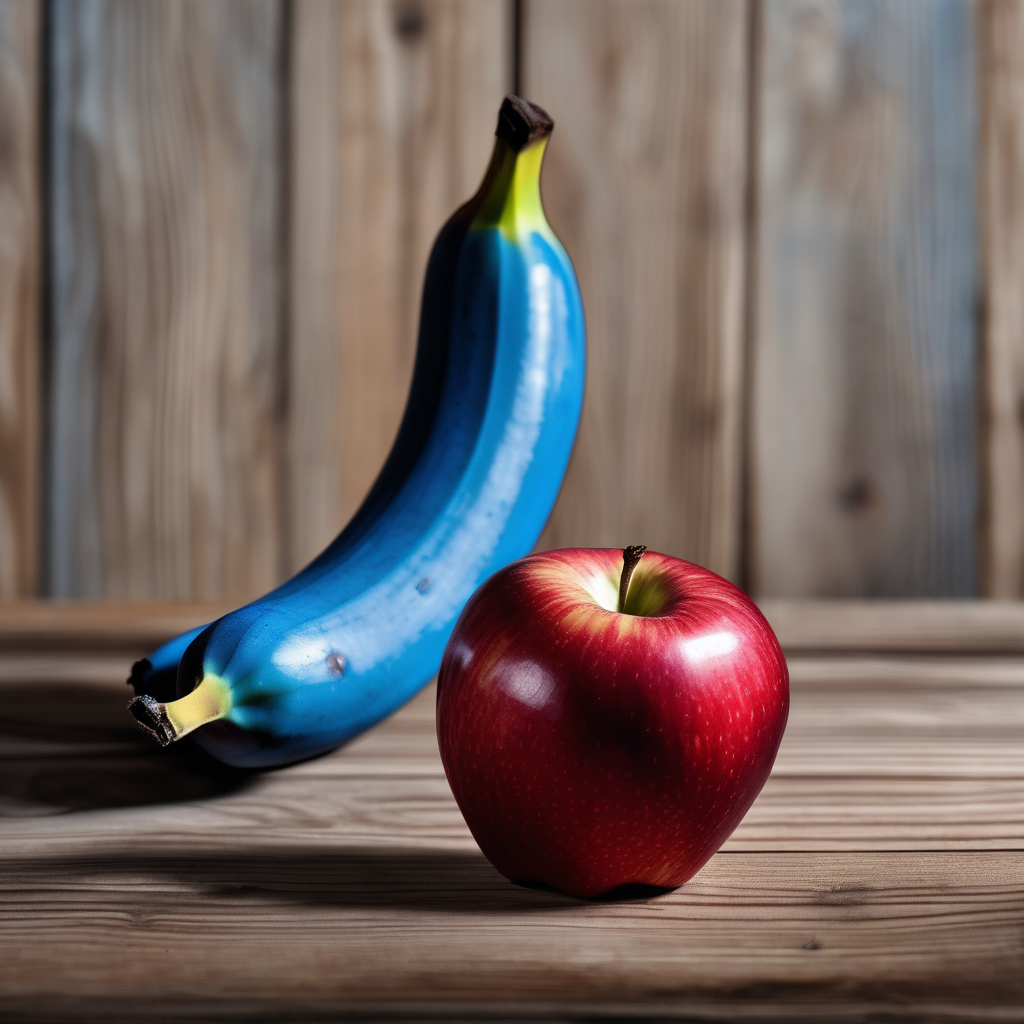

In [ ]:
# Define a descriptive prompt
prompt = "A high-quality photo of a red apple sitting to the left of a blue banana on a wooden table."

# best_image_adaptive, candidates_adaptive, scores_adaptive = generate_adaptively(prompt, negative_prompt, pipe)
best_image_adaptive, candidates_adaptive, scores_adaptive = generate_adaptively(prompt, pipe)

print("\n--- FINAL SELECTED IMAGE (ADAPTIVE METHOD) ---")
display(best_image_adaptive)

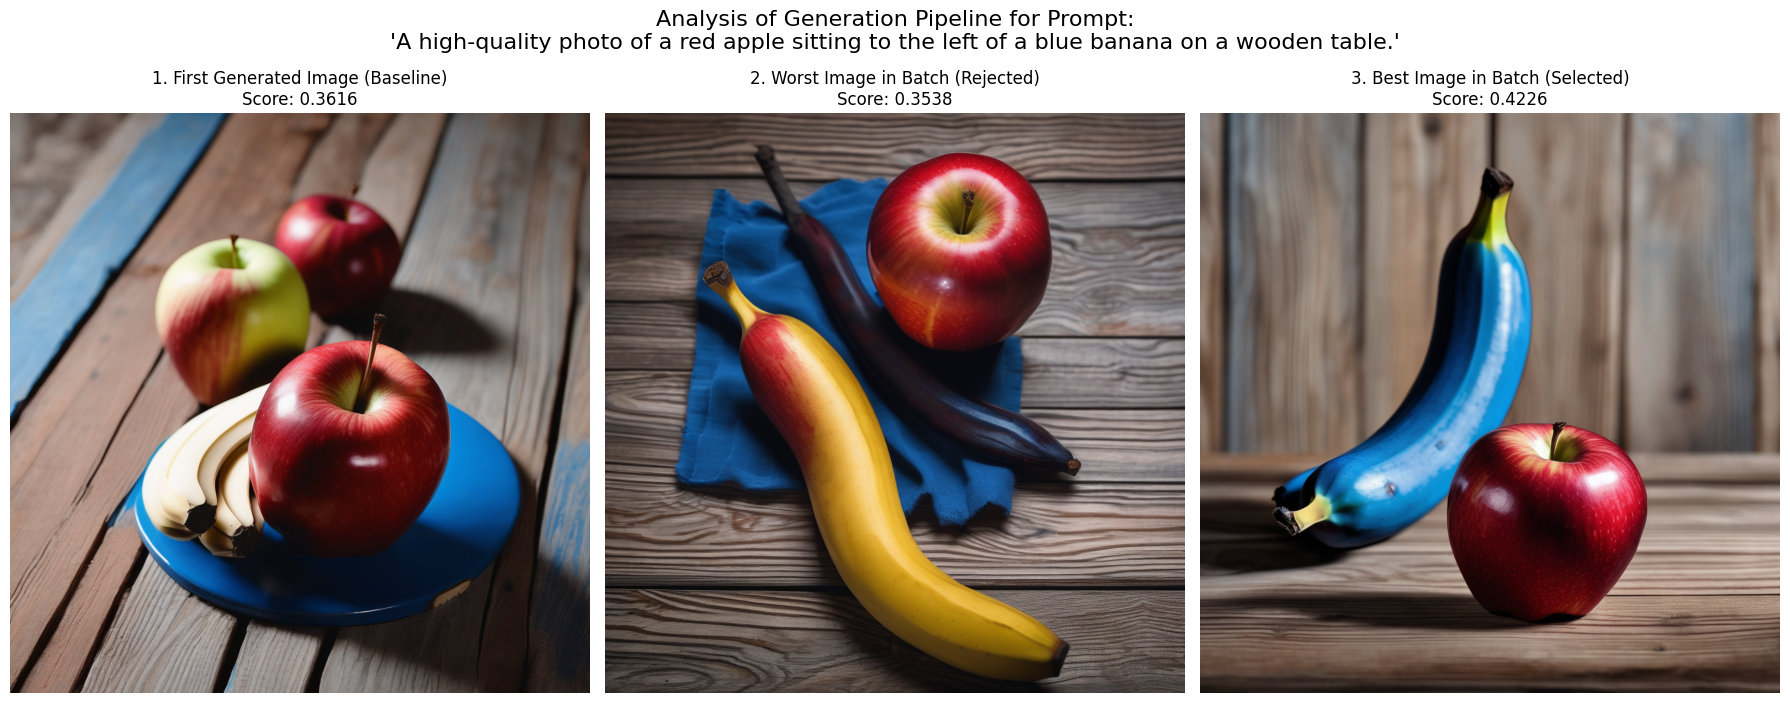

In [8]:
# Cell: Final Analysis - Comparing First, Worst, and Best Images

# Ensure we have some candidates to analyze
if not candidates_adaptive:
    print("No candidates were generated. Please run the generation cell first.")
else:
    # --- 1. Identify the Three Key Images ---

    # The first image is simply the first one in the list
    first_image = candidates_adaptive[0]
    first_image_score = scores_adaptive[0].item()

    # The worst image is the one with the minimum score in the batch
    worst_image_index = scores_adaptive.argmin().item()
    worst_image = candidates_adaptive[worst_image_index]
    worst_image_score = scores_adaptive.min().item()

    # The best image is the one returned by our function (or the max score)
    best_image = best_image_adaptive
    best_image_score = scores_adaptive.max().item()

    
    # --- 2. Create the Comparison Visualization ---
    
    # Create a figure with 3 subplots in a single row
    fig, axs = plt.subplots(1, 3, figsize=(18, 7))
    fig.suptitle(f"Analysis of Generation Pipeline for Prompt:\n'{prompt}'", fontsize=16, y=1.02)

    # --- Panel 1: The "Default" First Image ---
    axs[0].imshow(first_image)
    axs[0].set_title(f"1. First Generated Image (Baseline)\nScore: {first_image_score:.4f}", fontsize=12)
    axs[0].axis('off')

    # --- Panel 2: The Worst Image Filtered Out ---
    axs[1].imshow(worst_image)
    axs[1].set_title(f"2. Worst Image in Batch (Rejected)\nScore: {worst_image_score:.4f}", fontsize=12)
    axs[1].axis('off')

    # --- Panel 3: The Final Selected Image ---
    axs[2].imshow(best_image)
    axs[2].set_title(f"3. Best Image in Batch (Selected)\nScore: {best_image_score:.4f}", fontsize=12)
    axs[2].axis('off')

    # Adjust layout to prevent titles from overlapping and display the plot
    plt.tight_layout()
    plt.show()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import math

# --- Hardcoded Evaluation Set ---
prompts_to_evaluate = {
    "Simple": [
        "photo of a single red apple",
        "a blue coffee mug on a white background",
        "a wooden chair",
        "a yellow rubber duck",
        "a single green leaf",
        "a tennis ball",
        "a generic houseplant in a pot",
        "a pair of black sunglasses"
    ],
    "Complex": [
        "A wide-angle photorealistic shot of a cyborg fox with glowing blue eyes, sitting at a worn-out poker table in a dimly lit, smoky backroom of a futuristic cantina. On the table are holographic playing cards and stacks of metallic chips.",
        "A tiny, crystal mouse sleeping on the petal of a giant, bioluminescent lotus flower floating in the center of an ancient, starlit cavern. The scene is rendered in the style of a cinematic fantasy concept art, with volumetric lighting and god rays.",
        "An oil painting in the dramatic and chaotic style of Caravaggio depicting a tense chess match between a skeleton and an angel. The only light source is a single candle on the table, casting long, dramatic shadows across their faces.",
        "A macro photograph of three glass marbles arranged in a pyramid on a cracked mirror. The reflection shows a stormy, purple sky instead of the marbles. The lighting is sharp and clinical.",
        "A surreal, Escher-inspired architectural drawing of a library where the staircases loop into themselves and bookshelves defy gravity, all constructed from brass and dark mahogany. A lone figure is reading a book that emits a soft, golden light.",
        "A 1980s retro-futuristic synthwave album cover featuring a chrome T-Rex wearing mirrored sunglasses, driving a DeLorean through a neon grid landscape towards a setting sun.",
        "A half-eaten gingerbread man with a look of existential dread, lying on a pristine white plate next to a silver fork. The image is a high-contrast, black and white fine-art photograph.",
        "The feeling of nostalgia personified as a ghostly, translucent figure made of shimmering, fading memories, walking through a deserted and overgrown playground at dusk. The style is ethereal and dreamlike."
    ]
}

# --- Evaluation Parameters for the Adaptive Function ---
min_candidates_adaptive = 4   # The minimum number of images to generate
max_candidates_adaptive = 32  # The maximum safety stop
patience_adaptive = 5         # How many non-improving images before stopping

# --- Data Storage ---
evaluation_results = []

print("Evaluation setup is complete. Using the adaptive generation pipeline.")

Evaluation setup is complete. Using the adaptive generation pipeline.


In [10]:
# Loop through each prompt type and each prompt in our evaluation set
for prompt_type, prompt_list in prompts_to_evaluate.items():
    for prompt in prompt_list:
        print(f"\n--- Processing '{prompt_type}' prompt: '{prompt[:60]}...' ---")
        
        # --- 1. Run the entire adaptive pipeline for the current prompt ---
        best_image, all_candidates, all_scores = generate_adaptively(
            prompt,
            pipe,
            min_candidates=min_candidates_adaptive,
            max_candidates=max_candidates_adaptive,
            patience=patience_adaptive
        )
        
        # --- 2. Check if the generation was successful ---
        if not all_candidates:
            print(f"Skipping prompt '{prompt[:60]}...' due to generation failure.")
            continue
            
        scores_numpy = all_scores.cpu().numpy() # Convert scores to NumPy for analysis

        # --- 3. Extract Key Metrics from the results ---
        num_generated = len(all_candidates)
        first_image_score = scores_numpy[0] if num_generated > 0 else 0.0
        best_image_score = np.max(scores_numpy) if num_generated > 0 else 0.0
        
        # The score variance across all generated images
        score_variance = np.var(scores_numpy) if num_generated > 1 else 0.0
        
        # --- 4. Store the results ---
        evaluation_results.append({
            "Prompt Type": prompt_type,
            "Prompt": prompt,
            "First Image Score (Baseline)": first_image_score,
            "Pipeline Best Score": best_image_score,
            "Score Variance": score_variance,
            "Candidates Generated": num_generated
        })

print("\n\n--- Automated Evaluation Complete ---")

# --- 5. Convert to a Pandas DataFrame for easy analysis ---
results_df = pd.DataFrame(evaluation_results)


--- Processing 'Simple' prompt: 'photo of a single red apple...' ---
--- Generating Candidate 1/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 7327349254543446. Score: 0.3430
IMPROVEMENT FOUND! New best score: 0.3430 (Old best: -1.0000)
--- Generating Candidate 2/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 6443935114657976. Score: 0.3455
IMPROVEMENT FOUND! New best score: 0.3455 (Old best: 0.3430)
--- Generating Candidate 3/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 5585110056056166. Score: 0.2808
No significant improvement. Patience: 1/5
--- Generating Candidate 4/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4685958750688178. Score: 0.2401
No significant improvement. Patience: 2/5
--- Generating Candidate 5/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 6534690948092672. Score: 0.2544
No significant improvement. Patience: 3/5
--- Generating Candidate 6/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3143075845974718. Score: 0.3279
No significant improvement. Patience: 4/5
--- Generating Candidate 7/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8827733133501068. Score: 0.2120
No significant improvement. Patience: 5/5

Stopping criteria met: Patience limit reached.

Adaptive generation finished in 301.42 seconds.
Generated a total of 7 images.

--- Processing 'Simple' prompt: 'a blue coffee mug on a white background...' ---
--- Generating Candidate 1/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3887596281760185. Score: 0.3293
IMPROVEMENT FOUND! New best score: 0.3293 (Old best: -1.0000)
--- Generating Candidate 2/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 7841715902511332. Score: 0.3335
IMPROVEMENT FOUND! New best score: 0.3335 (Old best: 0.3293)
--- Generating Candidate 3/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4563956321509640. Score: 0.3523
IMPROVEMENT FOUND! New best score: 0.3523 (Old best: 0.3335)
--- Generating Candidate 4/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2386802339113941. Score: 0.3599
IMPROVEMENT FOUND! New best score: 0.3599 (Old best: 0.3523)
--- Generating Candidate 5/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8752807896596967. Score: 0.3640
IMPROVEMENT FOUND! New best score: 0.3640 (Old best: 0.3599)
--- Generating Candidate 6/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2244748426193503. Score: 0.3594
No significant improvement. Patience: 1/5
--- Generating Candidate 7/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4569992478084079. Score: 0.3010
No significant improvement. Patience: 2/5
--- Generating Candidate 8/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 457261304406022. Score: 0.3269
No significant improvement. Patience: 3/5
--- Generating Candidate 9/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4252433734796017. Score: 0.3293
No significant improvement. Patience: 4/5
--- Generating Candidate 10/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3909808778264783. Score: 0.3545
No significant improvement. Patience: 5/5

Stopping criteria met: Patience limit reached.

Adaptive generation finished in 431.77 seconds.
Generated a total of 10 images.

--- Processing 'Simple' prompt: 'a wooden chair...' ---
--- Generating Candidate 1/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 5061645167581209. Score: 0.2952
IMPROVEMENT FOUND! New best score: 0.2952 (Old best: -1.0000)
--- Generating Candidate 2/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 6992735887676577. Score: 0.2788
No significant improvement. Patience: 1/5
--- Generating Candidate 3/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 5905681307596374. Score: 0.2766
No significant improvement. Patience: 2/5
--- Generating Candidate 4/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2355596769999161. Score: 0.3035
IMPROVEMENT FOUND! New best score: 0.3035 (Old best: 0.2952)
--- Generating Candidate 5/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 425741666576131. Score: 0.2898
No significant improvement. Patience: 1/5
--- Generating Candidate 6/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 1552747151559147. Score: 0.3516
IMPROVEMENT FOUND! New best score: 0.3516 (Old best: 0.3035)
--- Generating Candidate 7/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 1341100309761434. Score: 0.2915
No significant improvement. Patience: 1/5
--- Generating Candidate 8/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 1519094977977770. Score: 0.3340
No significant improvement. Patience: 2/5
--- Generating Candidate 9/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 5582941299449177. Score: 0.3252
No significant improvement. Patience: 3/5
--- Generating Candidate 10/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 1790040189804275. Score: 0.2974
No significant improvement. Patience: 4/5
--- Generating Candidate 11/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3903154486061271. Score: 0.2966
No significant improvement. Patience: 5/5

Stopping criteria met: Patience limit reached.

Adaptive generation finished in 472.18 seconds.
Generated a total of 11 images.

--- Processing 'Simple' prompt: 'a yellow rubber duck...' ---
--- Generating Candidate 1/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8913259706194109. Score: 0.3455
IMPROVEMENT FOUND! New best score: 0.3455 (Old best: -1.0000)
--- Generating Candidate 2/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 6396128985504643. Score: 0.3445
No significant improvement. Patience: 1/5
--- Generating Candidate 3/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 5848347677950477. Score: 0.3262
No significant improvement. Patience: 2/5
--- Generating Candidate 4/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 5430743520046032. Score: 0.3196
No significant improvement. Patience: 3/5
--- Generating Candidate 5/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3386833742265195. Score: 0.2961
No significant improvement. Patience: 4/5
--- Generating Candidate 6/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8330413791850170. Score: 0.3533
IMPROVEMENT FOUND! New best score: 0.3533 (Old best: 0.3455)
--- Generating Candidate 7/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4054821517065241. Score: 0.3115
No significant improvement. Patience: 1/5
--- Generating Candidate 8/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4500385445514888. Score: 0.3120
No significant improvement. Patience: 2/5
--- Generating Candidate 9/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8911641657349885. Score: 0.3452
No significant improvement. Patience: 3/5
--- Generating Candidate 10/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2550017556231417. Score: 0.3213
No significant improvement. Patience: 4/5
--- Generating Candidate 11/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 733484329678529. Score: 0.3611
IMPROVEMENT FOUND! New best score: 0.3611 (Old best: 0.3533)
--- Generating Candidate 12/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8456969981116686. Score: 0.2932
No significant improvement. Patience: 1/5
--- Generating Candidate 13/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 6922813759469665. Score: 0.3032
No significant improvement. Patience: 2/5
--- Generating Candidate 14/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4011973176716471. Score: 0.3408
No significant improvement. Patience: 3/5
--- Generating Candidate 15/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2632492872970605. Score: 0.3508
No significant improvement. Patience: 4/5
--- Generating Candidate 16/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4437050769285338. Score: 0.3496
No significant improvement. Patience: 5/5

Stopping criteria met: Patience limit reached.

Adaptive generation finished in 686.86 seconds.
Generated a total of 16 images.

--- Processing 'Simple' prompt: 'a single green leaf...' ---
--- Generating Candidate 1/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 7018659957156789. Score: 0.3582
IMPROVEMENT FOUND! New best score: 0.3582 (Old best: -1.0000)
--- Generating Candidate 2/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 114395815924513. Score: 0.3372
No significant improvement. Patience: 1/5
--- Generating Candidate 3/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2239467510696623. Score: 0.3501
No significant improvement. Patience: 2/5
--- Generating Candidate 4/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 5785932086456004. Score: 0.3389
No significant improvement. Patience: 3/5
--- Generating Candidate 5/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 1562734500167284. Score: 0.3635
IMPROVEMENT FOUND! New best score: 0.3635 (Old best: 0.3582)
--- Generating Candidate 6/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3779047515952129. Score: 0.3494
No significant improvement. Patience: 1/5
--- Generating Candidate 7/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 7440804061406544. Score: 0.3386
No significant improvement. Patience: 2/5
--- Generating Candidate 8/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 5866718371212164. Score: 0.3420
No significant improvement. Patience: 3/5
--- Generating Candidate 9/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 1723982221028167. Score: 0.3660
IMPROVEMENT FOUND! New best score: 0.3660 (Old best: 0.3635)
--- Generating Candidate 10/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2129665407335546. Score: 0.3462
No significant improvement. Patience: 1/5
--- Generating Candidate 11/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 7310799182939018. Score: 0.3374
No significant improvement. Patience: 2/5
--- Generating Candidate 12/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8975305475826330. Score: 0.3337
No significant improvement. Patience: 3/5
--- Generating Candidate 13/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2334249705444487. Score: 0.3027
No significant improvement. Patience: 4/5
--- Generating Candidate 14/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3622364471588088. Score: 0.3337
No significant improvement. Patience: 5/5

Stopping criteria met: Patience limit reached.

Adaptive generation finished in 601.94 seconds.
Generated a total of 14 images.

--- Processing 'Simple' prompt: 'a tennis ball...' ---
--- Generating Candidate 1/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4463054507883619. Score: 0.3357
IMPROVEMENT FOUND! New best score: 0.3357 (Old best: -1.0000)
--- Generating Candidate 2/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3974667787732195. Score: 0.3230
No significant improvement. Patience: 1/5
--- Generating Candidate 3/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 7310691625907517. Score: 0.3210
No significant improvement. Patience: 2/5
--- Generating Candidate 4/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4934728293464863. Score: 0.3032
No significant improvement. Patience: 3/5
--- Generating Candidate 5/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3135899726956990. Score: 0.2747
No significant improvement. Patience: 4/5
--- Generating Candidate 6/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2821584852469238. Score: 0.3491
IMPROVEMENT FOUND! New best score: 0.3491 (Old best: 0.3357)
--- Generating Candidate 7/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3651570656626694. Score: 0.3003
No significant improvement. Patience: 1/5
--- Generating Candidate 8/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4212789389665099. Score: 0.3550
IMPROVEMENT FOUND! New best score: 0.3550 (Old best: 0.3491)
--- Generating Candidate 9/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8217381045074255. Score: 0.2598
No significant improvement. Patience: 1/5
--- Generating Candidate 10/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 7696950999885936. Score: 0.2595
No significant improvement. Patience: 2/5
--- Generating Candidate 11/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8871311611167770. Score: 0.3579
IMPROVEMENT FOUND! New best score: 0.3579 (Old best: 0.3550)
--- Generating Candidate 12/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4362007548119372. Score: 0.3274
No significant improvement. Patience: 1/5
--- Generating Candidate 13/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4308590707957381. Score: 0.3181
No significant improvement. Patience: 2/5
--- Generating Candidate 14/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 5579693589639716. Score: 0.3462
No significant improvement. Patience: 3/5
--- Generating Candidate 15/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8060641542595810. Score: 0.3435
No significant improvement. Patience: 4/5
--- Generating Candidate 16/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 1574662145995955. Score: 0.3447
No significant improvement. Patience: 5/5

Stopping criteria met: Patience limit reached.

Adaptive generation finished in 688.44 seconds.
Generated a total of 16 images.

--- Processing 'Simple' prompt: 'a generic houseplant in a pot...' ---
--- Generating Candidate 1/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4425114670837072. Score: 0.3257
IMPROVEMENT FOUND! New best score: 0.3257 (Old best: -1.0000)
--- Generating Candidate 2/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 7950980696459995. Score: 0.3254
No significant improvement. Patience: 1/5
--- Generating Candidate 3/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 1792062520666262. Score: 0.3130
No significant improvement. Patience: 2/5
--- Generating Candidate 4/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 7988367304699978. Score: 0.3125
No significant improvement. Patience: 3/5
--- Generating Candidate 5/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 1965919939699657. Score: 0.3164
No significant improvement. Patience: 4/5
--- Generating Candidate 6/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3608404006706760. Score: 0.3301
IMPROVEMENT FOUND! New best score: 0.3301 (Old best: 0.3257)
--- Generating Candidate 7/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 5484352372626642. Score: 0.3076
No significant improvement. Patience: 1/5
--- Generating Candidate 8/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3028898249437757. Score: 0.3240
No significant improvement. Patience: 2/5
--- Generating Candidate 9/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 5610377574749314. Score: 0.2876
No significant improvement. Patience: 3/5
--- Generating Candidate 10/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 5231898893397757. Score: 0.3037
No significant improvement. Patience: 4/5
--- Generating Candidate 11/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 7819855114995442. Score: 0.3054
No significant improvement. Patience: 5/5

Stopping criteria met: Patience limit reached.

Adaptive generation finished in 473.51 seconds.
Generated a total of 11 images.

--- Processing 'Simple' prompt: 'a pair of black sunglasses...' ---
--- Generating Candidate 1/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8196426967672435. Score: 0.3101
IMPROVEMENT FOUND! New best score: 0.3101 (Old best: -1.0000)
--- Generating Candidate 2/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 1885457376299580. Score: 0.2937
No significant improvement. Patience: 1/5
--- Generating Candidate 3/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 1051117463299232. Score: 0.2839
No significant improvement. Patience: 2/5
--- Generating Candidate 4/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3082421448945736. Score: 0.2573
No significant improvement. Patience: 3/5
--- Generating Candidate 5/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 573863831331905. Score: 0.3079
No significant improvement. Patience: 4/5
--- Generating Candidate 6/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3433713387153940. Score: 0.2991
No significant improvement. Patience: 5/5

Stopping criteria met: Patience limit reached.

Adaptive generation finished in 258.45 seconds.
Generated a total of 6 images.

--- Processing 'Complex' prompt: 'A wide-angle photorealistic shot of a cyborg fox with glowin...' ---
--- Generating Candidate 1/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2629691454248069. Score: 0.4324
IMPROVEMENT FOUND! New best score: 0.4324 (Old best: -1.0000)
--- Generating Candidate 2/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 1497967074493684. Score: 0.4514
IMPROVEMENT FOUND! New best score: 0.4514 (Old best: 0.4324)
--- Generating Candidate 3/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3095288063737230. Score: 0.4167
No significant improvement. Patience: 1/5
--- Generating Candidate 4/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3117240284207655. Score: 0.4463
No significant improvement. Patience: 2/5
--- Generating Candidate 5/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 7539506127296949. Score: 0.4412
No significant improvement. Patience: 3/5
--- Generating Candidate 6/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8324858896664454. Score: 0.4453
No significant improvement. Patience: 4/5
--- Generating Candidate 7/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3956952485139969. Score: 0.4358
No significant improvement. Patience: 5/5

Stopping criteria met: Patience limit reached.

Adaptive generation finished in 302.36 seconds.
Generated a total of 7 images.

--- Processing 'Complex' prompt: 'A tiny, crystal mouse sleeping on the petal of a giant, biol...' ---
--- Generating Candidate 1/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4584420194901952. Score: 0.5073
IMPROVEMENT FOUND! New best score: 0.5073 (Old best: -1.0000)
--- Generating Candidate 2/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 7935943900660297. Score: 0.4539
No significant improvement. Patience: 1/5
--- Generating Candidate 3/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 5582612235493134. Score: 0.4668
No significant improvement. Patience: 2/5
--- Generating Candidate 4/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 286504815310561. Score: 0.4321
No significant improvement. Patience: 3/5
--- Generating Candidate 5/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 333311212533569. Score: 0.4905
No significant improvement. Patience: 4/5
--- Generating Candidate 6/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2243445972595980. Score: 0.4829
No significant improvement. Patience: 5/5

Stopping criteria met: Patience limit reached.

Adaptive generation finished in 259.10 seconds.
Generated a total of 6 images.

--- Processing 'Complex' prompt: 'An oil painting in the dramatic and chaotic style of Caravag...' ---
--- Generating Candidate 1/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2684686809409467. Score: 0.4131
IMPROVEMENT FOUND! New best score: 0.4131 (Old best: -1.0000)
--- Generating Candidate 2/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8614909305341563. Score: 0.4124
No significant improvement. Patience: 1/5
--- Generating Candidate 3/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 1202508724504475. Score: 0.4314
IMPROVEMENT FOUND! New best score: 0.4314 (Old best: 0.4131)
--- Generating Candidate 4/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 541998432671116. Score: 0.4470
IMPROVEMENT FOUND! New best score: 0.4470 (Old best: 0.4314)
--- Generating Candidate 5/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8824391240928873. Score: 0.4399
No significant improvement. Patience: 1/5
--- Generating Candidate 6/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 7771553081228820. Score: 0.4333
No significant improvement. Patience: 2/5
--- Generating Candidate 7/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8716286173319667. Score: 0.4607
IMPROVEMENT FOUND! New best score: 0.4607 (Old best: 0.4470)
--- Generating Candidate 8/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8463673369506345. Score: 0.4351
No significant improvement. Patience: 1/5
--- Generating Candidate 9/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2185893618065159. Score: 0.4297
No significant improvement. Patience: 2/5
--- Generating Candidate 10/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2513410059283256. Score: 0.4204
No significant improvement. Patience: 3/5
--- Generating Candidate 11/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 6692924537047753. Score: 0.4431
No significant improvement. Patience: 4/5
--- Generating Candidate 12/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2329772745860948. Score: 0.4424
No significant improvement. Patience: 5/5

Stopping criteria met: Patience limit reached.

Adaptive generation finished in 518.38 seconds.
Generated a total of 12 images.

--- Processing 'Complex' prompt: 'A macro photograph of three glass marbles arranged in a pyra...' ---
--- Generating Candidate 1/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 6960258658397788. Score: 0.4429
IMPROVEMENT FOUND! New best score: 0.4429 (Old best: -1.0000)
--- Generating Candidate 2/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3417550917595607. Score: 0.4375
No significant improvement. Patience: 1/5
--- Generating Candidate 3/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4211675430988977. Score: 0.4668
IMPROVEMENT FOUND! New best score: 0.4668 (Old best: 0.4429)
--- Generating Candidate 4/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3354032401964931. Score: 0.4456
No significant improvement. Patience: 1/5
--- Generating Candidate 5/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8320624809565096. Score: 0.4324
No significant improvement. Patience: 2/5
--- Generating Candidate 6/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 1071406810284840. Score: 0.4465
No significant improvement. Patience: 3/5
--- Generating Candidate 7/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 5070754653502268. Score: 0.4697
IMPROVEMENT FOUND! New best score: 0.4697 (Old best: 0.4668)
--- Generating Candidate 8/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3825795721201645. Score: 0.4858
IMPROVEMENT FOUND! New best score: 0.4858 (Old best: 0.4697)
--- Generating Candidate 9/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 6013486272021616. Score: 0.4644
No significant improvement. Patience: 1/5
--- Generating Candidate 10/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3492552440176285. Score: 0.4529
No significant improvement. Patience: 2/5
--- Generating Candidate 11/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2432607575154090. Score: 0.4570
No significant improvement. Patience: 3/5
--- Generating Candidate 12/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 6113519398097022. Score: 0.4592
No significant improvement. Patience: 4/5
--- Generating Candidate 13/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 6626696034358981. Score: 0.4485
No significant improvement. Patience: 5/5

Stopping criteria met: Patience limit reached.

Adaptive generation finished in 559.89 seconds.
Generated a total of 13 images.

--- Processing 'Complex' prompt: 'A surreal, Escher-inspired architectural drawing of a librar...' ---
--- Generating Candidate 1/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 488348414825478. Score: 0.3750
IMPROVEMENT FOUND! New best score: 0.3750 (Old best: -1.0000)
--- Generating Candidate 2/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2506929579889770. Score: 0.3713
No significant improvement. Patience: 1/5
--- Generating Candidate 3/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8044178966897868. Score: 0.4031
IMPROVEMENT FOUND! New best score: 0.4031 (Old best: 0.3750)
--- Generating Candidate 4/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 7051854135860486. Score: 0.4233
IMPROVEMENT FOUND! New best score: 0.4233 (Old best: 0.4031)
--- Generating Candidate 5/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 1360877190914815. Score: 0.4128
No significant improvement. Patience: 1/5
--- Generating Candidate 6/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 1192150310186399. Score: 0.3955
No significant improvement. Patience: 2/5
--- Generating Candidate 7/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 6620619334206621. Score: 0.3416
No significant improvement. Patience: 3/5
--- Generating Candidate 8/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2632919110443076. Score: 0.4272
IMPROVEMENT FOUND! New best score: 0.4272 (Old best: 0.4233)
--- Generating Candidate 9/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8518709756071949. Score: 0.3918
No significant improvement. Patience: 1/5
--- Generating Candidate 10/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2020392707736765. Score: 0.4207
No significant improvement. Patience: 2/5
--- Generating Candidate 11/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8245869990293841. Score: 0.4116
No significant improvement. Patience: 3/5
--- Generating Candidate 12/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 7908583543675703. Score: 0.4185
No significant improvement. Patience: 4/5
--- Generating Candidate 13/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 6128509389650641. Score: 0.3914
No significant improvement. Patience: 5/5

Stopping criteria met: Patience limit reached.

Adaptive generation finished in 561.29 seconds.
Generated a total of 13 images.

--- Processing 'Complex' prompt: 'A 1980s retro-futuristic synthwave album cover featuring a c...' ---
--- Generating Candidate 1/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8917906374510079. Score: 0.3845
IMPROVEMENT FOUND! New best score: 0.3845 (Old best: -1.0000)
--- Generating Candidate 2/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3533764263925955. Score: 0.4092
IMPROVEMENT FOUND! New best score: 0.4092 (Old best: 0.3845)
--- Generating Candidate 3/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8484349202052365. Score: 0.3906
No significant improvement. Patience: 1/5
--- Generating Candidate 4/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 1482365321538731. Score: 0.4045
No significant improvement. Patience: 2/5
--- Generating Candidate 5/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 882395400290002. Score: 0.3894
No significant improvement. Patience: 3/5
--- Generating Candidate 6/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 7408207468879589. Score: 0.3904
No significant improvement. Patience: 4/5
--- Generating Candidate 7/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8869248517169567. Score: 0.3984
No significant improvement. Patience: 5/5

Stopping criteria met: Patience limit reached.

Adaptive generation finished in 301.37 seconds.
Generated a total of 7 images.

--- Processing 'Complex' prompt: 'A half-eaten gingerbread man with a look of existential drea...' ---
--- Generating Candidate 1/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8689133710134325. Score: 0.3933
IMPROVEMENT FOUND! New best score: 0.3933 (Old best: -1.0000)
--- Generating Candidate 2/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 5057050316877120. Score: 0.3979
IMPROVEMENT FOUND! New best score: 0.3979 (Old best: 0.3933)
--- Generating Candidate 3/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 6411427498900336. Score: 0.3962
No significant improvement. Patience: 1/5
--- Generating Candidate 4/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4426259415417948. Score: 0.3735
No significant improvement. Patience: 2/5
--- Generating Candidate 5/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3037127129173767. Score: 0.4038
IMPROVEMENT FOUND! New best score: 0.4038 (Old best: 0.3979)
--- Generating Candidate 6/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 894417311643261. Score: 0.3887
No significant improvement. Patience: 1/5
--- Generating Candidate 7/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 621649394179491. Score: 0.3674
No significant improvement. Patience: 2/5
--- Generating Candidate 8/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8140341427340725. Score: 0.3721
No significant improvement. Patience: 3/5
--- Generating Candidate 9/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4647482137307492. Score: 0.3950
No significant improvement. Patience: 4/5
--- Generating Candidate 10/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8381033888555268. Score: 0.3699
No significant improvement. Patience: 5/5

Stopping criteria met: Patience limit reached.

Adaptive generation finished in 429.98 seconds.
Generated a total of 10 images.

--- Processing 'Complex' prompt: 'The feeling of nostalgia personified as a ghostly, transluce...' ---
--- Generating Candidate 1/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 7956431041954202. Score: 0.3955
IMPROVEMENT FOUND! New best score: 0.3955 (Old best: -1.0000)
--- Generating Candidate 2/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3779514889206404. Score: 0.2952
No significant improvement. Patience: 1/5
--- Generating Candidate 3/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2955338128882788. Score: 0.3704
No significant improvement. Patience: 2/5
--- Generating Candidate 4/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 5008826275680242. Score: 0.3357
No significant improvement. Patience: 3/5
--- Generating Candidate 5/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8583717778102652. Score: 0.3074
No significant improvement. Patience: 4/5
--- Generating Candidate 6/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 6684183352767433. Score: 0.4111
IMPROVEMENT FOUND! New best score: 0.4111 (Old best: 0.3955)
--- Generating Candidate 7/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2250354673475029. Score: 0.3984
No significant improvement. Patience: 1/5
--- Generating Candidate 8/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 7407172103746926. Score: 0.3767
No significant improvement. Patience: 2/5
--- Generating Candidate 9/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 6729625191102993. Score: 0.3625
No significant improvement. Patience: 3/5
--- Generating Candidate 10/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 7086201193628657. Score: 0.3755
No significant improvement. Patience: 4/5
--- Generating Candidate 11/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4280128712124130. Score: 0.3469
No significant improvement. Patience: 5/5

Stopping criteria met: Patience limit reached.

Adaptive generation finished in 475.81 seconds.
Generated a total of 11 images.


--- Automated Evaluation Complete ---


In [11]:
# Create a new column to explicitly show the improvement
results_df['Score Improvement'] = results_df['Pipeline Best Score'] - results_df['First Image Score (Baseline)']

# Select and reorder columns for a clean presentation
# We'll add 'Candidates Generated' to show the efficiency of the adaptive method
display_columns = [
    "Prompt Type",
    "First Image Score (Baseline)",
    "Pipeline Best Score",
    "Score Improvement",
    "Score Variance",
    "Candidates Generated"
]

# Display the final results table
print("--- Quantitative Evaluation Results (Adaptive Pipeline) ---")
pd.set_option('display.float_format', '{:.4f}'.format) # Format numbers for readability
print(results_df[display_columns])

--- Quantitative Evaluation Results (Adaptive Pipeline) ---
   Prompt Type  First Image Score (Baseline)  Pipeline Best Score  \
0       Simple                        0.3430               0.3455   
1       Simple                        0.3293               0.3640   
2       Simple                        0.2952               0.3516   
3       Simple                        0.3455               0.3611   
4       Simple                        0.3582               0.3660   
5       Simple                        0.3357               0.3579   
6       Simple                        0.3257               0.3301   
7       Simple                        0.3101               0.3101   
8      Complex                        0.4324               0.4514   
9      Complex                        0.5073               0.5073   
10     Complex                        0.4131               0.4607   
11     Complex                        0.4429               0.4858   
12     Complex                        0.375


--- Average Metrics by Prompt Type (Adaptive Pipeline) ---
             First Image Score (Baseline)  Pipeline Best Score  \
Prompt Type                                                      
Complex                            0.4180               0.4446   
Simple                             0.3303               0.3483   

             Score Variance  Candidates Generated  Score Improvement  
Prompt Type                                                           
Complex              0.0004                9.8750             0.0266  
Simple               0.0007               11.3750             0.0179  


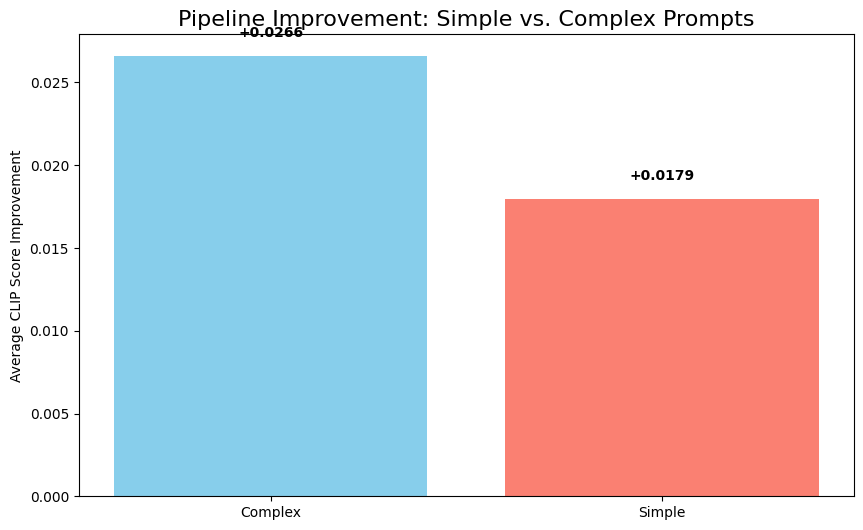

In [12]:
# --- 1. Calculate and display the average metrics for each prompt type ---
# We group by "Prompt Type" and calculate the mean for all numeric columns
aggregate_results = results_df.groupby("Prompt Type").mean(numeric_only=True)
print("\n--- Average Metrics by Prompt Type (Adaptive Pipeline) ---")
print(aggregate_results)


# --- 2. Create a Bar Chart to Visualize the Improvement ---
fig, ax = plt.subplots(figsize=(10, 6))

# Get the average improvement for simple and complex prompts
avg_improvement = aggregate_results['Score Improvement']
prompt_types = avg_improvement.index

ax.bar(prompt_types, avg_improvement, color=['skyblue', 'salmon'])
ax.set_ylabel('Average CLIP Score Improvement')
ax.set_title('Pipeline Improvement: Simple vs. Complex Prompts', fontsize=16)
ax.set_ylim(bottom=0)

# Add text labels on top of the bars
for i, v in enumerate(avg_improvement):
    ax.text(i, v + 0.001, f"+{v:.4f}", ha='center', va='bottom', fontweight='bold')

plt.show()

In [13]:
# --- Experiment Parameters ---
prompt_for_patience_test = "A photorealistic masterpiece of an astronaut playing a guitar on the moon, with Earth visible in the sky"
patience_values_to_test = [0, 1, 2, 3, 5, 7]
max_candidates_for_test = 32
min_candidates_for_test = 4

# --- Data Storage ---
patience_analysis_results = []

print("Setup complete. Ready to analyze the effect of 'patience'.")

Setup complete. Ready to analyze the effect of 'patience'.


In [14]:
# Ensure the original, unmodified `generate_adaptively` function is defined in a cell above this.
# This function should NOT take a generator as an argument.

# --- Main Experiment Loop ---
initial_seed = 42 # A fixed seed to make our entire experiment reproducible.

for patience_value in patience_values_to_test:
    print(f"\n--- Testing with patience = {patience_value} ---")
    
    # CRITICAL STEP FOR A FAIR COMPARISON:
    # We reset the global random seed before each run. This ensures that
    # the internal generator created by `generate_adaptively` will produce
    # the exact same sequence of random numbers every time.
    # This guarantees that the Nth image is identical across all tests.
    torch.manual_seed(initial_seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(initial_seed)

    # --- Start Timer ---
    start_time = time.time()
    
    # --- Run the UNMODIFIED adaptive generation function ---
    best_image, all_candidates, all_scores = generate_adaptively(
        prompt_for_patience_test,
        pipe,
        min_candidates=min_candidates_for_test,
        max_candidates=max_candidates_for_test,
        patience=patience_value
    )
    
    # --- End Timer ---
    end_time = time.time()
    total_time = end_time - start_time
    
    # --- Extract Results ---
    if not all_candidates:
        print("Generation failed for this setting.")
        continue
        
    final_best_score = all_scores.max().item()
    candidates_generated = len(all_candidates)
    
    print(f"Result: Patience={patience_value}, Best Score={final_best_score:.4f}, Time={total_time:.2f}s, Generated={candidates_generated} images")
    
    # --- Store the results ---
    patience_analysis_results.append({
        "Patience": patience_value,
        "Final Best Score": final_best_score,
        "Time Taken (s)": total_time,
        "Candidates Generated": candidates_generated
    })

# Convert to a DataFrame for analysis
patience_df = pd.DataFrame(patience_analysis_results)


--- Testing with patience = 0 ---
--- Generating Candidate 1/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 121101712494860. Score: 0.2913
IMPROVEMENT FOUND! New best score: 0.2913 (Old best: -1.0000)
--- Generating Candidate 2/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4848629839060213. Score: 0.2913
No significant improvement. Patience: 1/0
--- Generating Candidate 3/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3872088029796119. Score: 0.4141
IMPROVEMENT FOUND! New best score: 0.4141 (Old best: 0.2913)
--- Generating Candidate 4/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2702749462732526. Score: 0.4194
IMPROVEMENT FOUND! New best score: 0.4194 (Old best: 0.4141)

Stopping criteria met: Patience limit reached.

Adaptive generation finished in 173.00 seconds.
Generated a total of 4 images.
Result: Patience=0, Best Score=0.4194, Time=173.00s, Generated=4 images

--- Testing with patience = 1 ---
--- Generating Candidate 1/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 1289104924327097. Score: 0.4028
IMPROVEMENT FOUND! New best score: 0.4028 (Old best: -1.0000)
--- Generating Candidate 2/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 7517905538010915. Score: 0.4092
IMPROVEMENT FOUND! New best score: 0.4092 (Old best: 0.4028)
--- Generating Candidate 3/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 6680722359792470. Score: 0.3364
No significant improvement. Patience: 1/1
--- Generating Candidate 4/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8496683250200109. Score: 0.4070
No significant improvement. Patience: 2/1

Stopping criteria met: Patience limit reached.

Adaptive generation finished in 172.38 seconds.
Generated a total of 4 images.
Result: Patience=1, Best Score=0.4092, Time=172.38s, Generated=4 images

--- Testing with patience = 2 ---
--- Generating Candidate 1/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2075637390262786. Score: 0.4001
IMPROVEMENT FOUND! New best score: 0.4001 (Old best: -1.0000)
--- Generating Candidate 2/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 5668952484373060. Score: 0.4075
IMPROVEMENT FOUND! New best score: 0.4075 (Old best: 0.4001)
--- Generating Candidate 3/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8945521885171187. Score: 0.4053
No significant improvement. Patience: 1/2
--- Generating Candidate 4/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 7973860305181894. Score: 0.4014
No significant improvement. Patience: 2/2

Stopping criteria met: Patience limit reached.

Adaptive generation finished in 171.75 seconds.
Generated a total of 4 images.
Result: Patience=2, Best Score=0.4075, Time=171.75s, Generated=4 images

--- Testing with patience = 3 ---
--- Generating Candidate 1/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4134266082377066. Score: 0.3901
IMPROVEMENT FOUND! New best score: 0.3901 (Old best: -1.0000)
--- Generating Candidate 2/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 247191194577192. Score: 0.2949
No significant improvement. Patience: 1/3
--- Generating Candidate 3/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8112462990852604. Score: 0.2942
No significant improvement. Patience: 2/3
--- Generating Candidate 4/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4309260975803257. Score: 0.4026
IMPROVEMENT FOUND! New best score: 0.4026 (Old best: 0.3901)
--- Generating Candidate 5/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3182774118362153. Score: 0.2959
No significant improvement. Patience: 1/3
--- Generating Candidate 6/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 6624395208253842. Score: 0.4021
No significant improvement. Patience: 2/3
--- Generating Candidate 7/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 6092895228226676. Score: 0.4050
IMPROVEMENT FOUND! New best score: 0.4050 (Old best: 0.4026)
--- Generating Candidate 8/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8443918494341906. Score: 0.4243
IMPROVEMENT FOUND! New best score: 0.4243 (Old best: 0.4050)
--- Generating Candidate 9/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 1365670657978109. Score: 0.4021
No significant improvement. Patience: 1/3
--- Generating Candidate 10/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8460360840780694. Score: 0.4053
No significant improvement. Patience: 2/3
--- Generating Candidate 11/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8041717205682965. Score: 0.4114
No significant improvement. Patience: 3/3

Stopping criteria met: Patience limit reached.

Adaptive generation finished in 474.63 seconds.
Generated a total of 11 images.
Result: Patience=3, Best Score=0.4243, Time=474.63s, Generated=11 images

--- Testing with patience = 5 ---
--- Generating Candidate 1/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 1961888017621451. Score: 0.3999
IMPROVEMENT FOUND! New best score: 0.3999 (Old best: -1.0000)
--- Generating Candidate 2/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2141783316287935. Score: 0.2842
No significant improvement. Patience: 1/5
--- Generating Candidate 3/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3156228157122767. Score: 0.4304
IMPROVEMENT FOUND! New best score: 0.4304 (Old best: 0.3999)
--- Generating Candidate 4/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 5765404398669721. Score: 0.4133
No significant improvement. Patience: 1/5
--- Generating Candidate 5/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2175979960172157. Score: 0.4290
No significant improvement. Patience: 2/5
--- Generating Candidate 6/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 7776753713177783. Score: 0.3027
No significant improvement. Patience: 3/5
--- Generating Candidate 7/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3731166480883090. Score: 0.2913
No significant improvement. Patience: 4/5
--- Generating Candidate 8/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 7429589926644132. Score: 0.2964
No significant improvement. Patience: 5/5

Stopping criteria met: Patience limit reached.

Adaptive generation finished in 346.36 seconds.
Generated a total of 8 images.
Result: Patience=5, Best Score=0.4304, Time=346.36s, Generated=8 images

--- Testing with patience = 7 ---
--- Generating Candidate 1/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 7690067915680187. Score: 0.4111
IMPROVEMENT FOUND! New best score: 0.4111 (Old best: -1.0000)
--- Generating Candidate 2/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3576888202269576. Score: 0.2935
No significant improvement. Patience: 1/7
--- Generating Candidate 3/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4397193358819581. Score: 0.4128
IMPROVEMENT FOUND! New best score: 0.4128 (Old best: 0.4111)
--- Generating Candidate 4/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4798970578183763. Score: 0.2837
No significant improvement. Patience: 1/7
--- Generating Candidate 5/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 5729417336021126. Score: 0.4036
No significant improvement. Patience: 2/7
--- Generating Candidate 6/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 3980028702363904. Score: 0.4280
IMPROVEMENT FOUND! New best score: 0.4280 (Old best: 0.4128)
--- Generating Candidate 7/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8563602052096255. Score: 0.2986
No significant improvement. Patience: 1/7
--- Generating Candidate 8/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 6409318360127727. Score: 0.4055
No significant improvement. Patience: 2/7
--- Generating Candidate 9/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 8753805349836826. Score: 0.3467
No significant improvement. Patience: 3/7
--- Generating Candidate 10/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 296132857602935. Score: 0.4045
No significant improvement. Patience: 4/7
--- Generating Candidate 11/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 4642740448721790. Score: 0.4128
No significant improvement. Patience: 5/7
--- Generating Candidate 12/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 2369722501383606. Score: 0.4121
No significant improvement. Patience: 6/7
--- Generating Candidate 13/32 ---


  0%|          | 0/40 [00:00<?, ?it/s]

Generated image with seed 1855514673001287. Score: 0.4089
No significant improvement. Patience: 7/7

Stopping criteria met: Patience limit reached.

Adaptive generation finished in 558.88 seconds.
Generated a total of 13 images.
Result: Patience=7, Best Score=0.4280, Time=558.88s, Generated=13 images



--- Analysis of Patience Parameter ---
   Patience  Final Best Score  Time Taken (s)  Candidates Generated
0         0            0.4194        172.9969                     4
1         1            0.4092        172.3841                     4
2         2            0.4075        171.7512                     4
3         3            0.4243        474.6266                    11
4         5            0.4304        346.3589                     8
5         7            0.4280        558.8806                    13


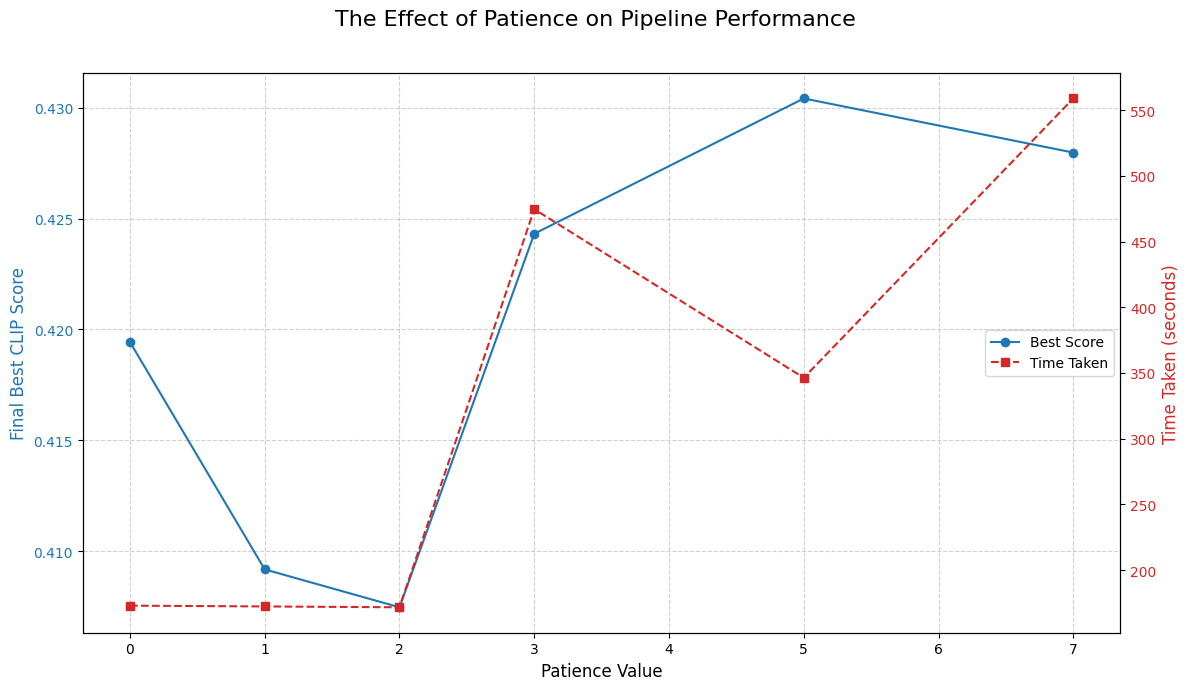

In [15]:
print("\n--- Analysis of Patience Parameter ---")
print(patience_df)

# --- Create the plot ---
fig, ax1 = plt.subplots(figsize=(12, 7))
fig.suptitle('The Effect of Patience on Pipeline Performance', fontsize=16)

# --- Axis 1: Plotting the Final Best Score ---
color = 'tab:blue'
ax1.set_xlabel('Patience Value', fontsize=12)
ax1.set_ylabel('Final Best CLIP Score', color=color, fontsize=12)
ax1.plot(patience_df['Patience'], patience_df['Final Best Score'], color=color, marker='o', linestyle='-', label='Best Score')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.6)

# --- Axis 2: Plotting the Time Taken ---
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Time Taken (seconds)', color=color, fontsize=12)
ax2.plot(patience_df['Patience'], patience_df['Time Taken (s)'], color=color, marker='s', linestyle='--', label='Time Taken')
ax2.tick_params(axis='y', labelcolor=color)

# --- Final Touches ---
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center right')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()